In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# import dataset
df = pd.read_csv("used_car_data.csv")

In [3]:
# show the first 10 records
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [5]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [8]:
# list the data types for each column
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [9]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
df['Name'].describe()

count                       5975
unique                      1855
top       Mahindra XUV500 W8 2WD
freq                          49
Name: Name, dtype: object

In [11]:
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 100)

In [12]:
# Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek tersebut?

# make new column brand_name (after splitting the string from name column)
df['brand_name'] = df['Name'].apply(lambda x: str(x).split(" ")[0])

In [13]:
df['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [14]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD          49
Maruti Swift VDI                45
Honda City 1.5 S MT             34
Maruti Swift Dzire VDI          34
Maruti Swift VDI BSIV           31
                                ..
Honda City i DTec E              1
Jaguar XE Portfolio              1
Honda CR-V 2.4L 4WD AT AVN       1
Nissan Sunny XE P                1
Tata Indica V2 2001-2011 eLS     1
Name: Name, Length: 1855, dtype: int64

In [15]:
df['brand_name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [16]:
df['brand_name'].value_counts()

Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Isuzu               1
Ambassador          1
Smart               1
Lamborghini         1
Name: brand_name, dtype: int64

In [17]:
# Kota apa yang memiliki mobil bekas paling banyak?
df['Location'].value_counts()

Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64

In [18]:
# Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?
df['Year'].describe()

count    5975.000000
mean     2013.386778
std         3.247238
min      1998.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Frequency Histogram')]

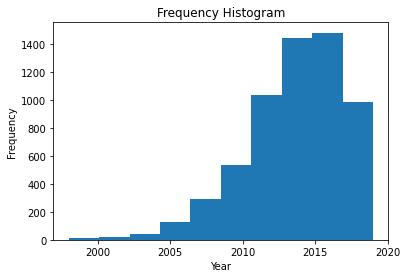

In [19]:
# sns.distplot('Year')
x = df['Year']
plt.hist(x)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency', xlabel='Year')

In [20]:
print("Skew ", df['Year'].skew())

Skew  -0.841781222881756


In [21]:
# Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?
total_mobil = df[df['Kilometers_Driven']<100000]

In [22]:
total_mobil

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand_name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Honda Amaze VX i-DTEC,Coimbatore,2015,70602,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,4.83,Honda
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,Maruti
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,Mahindra
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,Maruti


In [23]:
print(max(df['Kilometers_Driven']))

6500000


In [24]:
# it's an outlier!
df.drop(df[df['Kilometers_Driven'] >= 6500000].index, axis=0, inplace=True)

In [25]:
# Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi? Sertakan argumen yang mendukung jawaban.
bins = np.linspace(min(df['Kilometers_Driven']), max(df['Kilometers_Driven']), 3)
bins

array([1.710000e+02, 3.875855e+05, 7.750000e+05])

In [26]:
group_names = ['rendah','tinggi']

In [27]:
df['Kilometers_binned'] = pd.cut(df['Kilometers_Driven'], bins, labels=group_names)
df[['Kilometers_Driven','Kilometers_binned']].head(10)

,Kilometers_Driven,Kilometers_binned
0,72000,rendah
1,41000,rendah
2,46000,rendah
3,87000,rendah
4,40670,rendah
5,75000,rendah
6,86999,rendah
7,36000,rendah
8,64430,rendah
9,65932,rendah


In [28]:
df['Kilometers_binned'].value_counts()

rendah    5967
tinggi       6
Name: Kilometers_binned, dtype: int64

In [29]:
tinggi = df[df['Kilometers_binned'] == 'tinggi']
tinggi

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand_name,Kilometers_binned
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,7.50,Skoda,tinggi
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.70,Hyundai,tinggi
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.90,Volkswagen,tinggi
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.0,13.00,Volkswagen,tinggi
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,5.00,Honda,tinggi
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,4.45,Hyundai,tinggi


In [30]:
rendah = df[df['Kilometers_binned'] == 'rendah']
rendah.sort_values(by=['Kilometers_Driven'], inplace=True)
rendah

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand_name,Kilometers_binned
5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,6.25,Maruti,rendah
1598,Tata Xenon XT EX 4X2,Jaipur,2017,1000,Diesel,Manual,First,13.49 kmpl,2179 CC,138.03 bhp,5.0,7.50,Tata,rendah
1198,Volkswagen Polo 1.0 MPI Trendline,Hyderabad,2019,1000,Petrol,Manual,First,18.78 kmpl,999 CC,75 bhp,5.0,5.68,Volkswagen,rendah
5941,Renault KWID RXL,Pune,2018,1000,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,3.40,Renault,rendah
173,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,6.50,Hyundai,rendah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,Toyota Innova 2.5 GX (Diesel) 7 Seater,Pune,2013,255000,Diesel,Manual,Third,12.99 kmpl,2494 CC,100.6 bhp,7.0,6.50,Toyota,rendah
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.8 kmpl,2494 CC,102 bhp,7.0,4.00,Toyota,rendah
1975,Skoda Superb 1.8 TSI MT,Pune,2012,282000,Petrol,Manual,First,13.14 kmpl,1798 CC,160 bhp,5.0,3.30,Skoda,rendah
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.0,4.00,Toyota,rendah


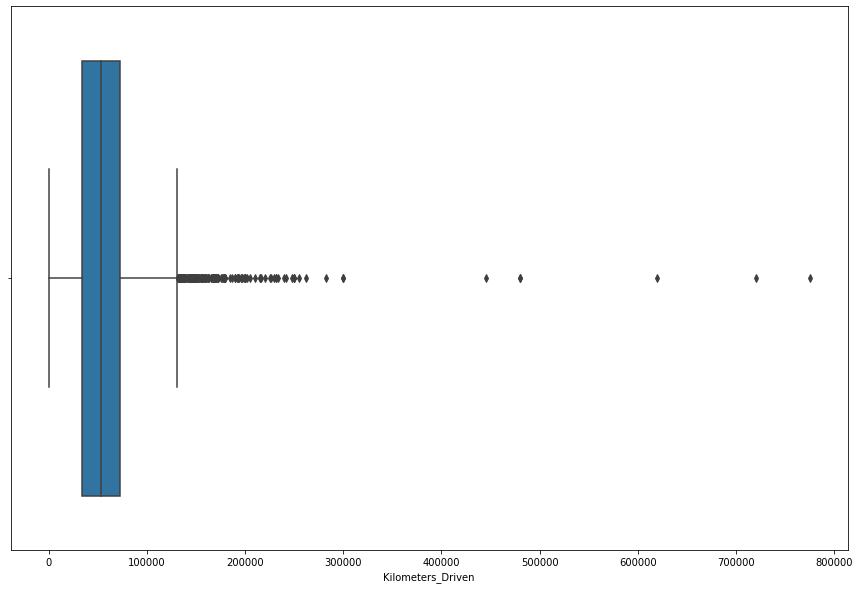

In [31]:
# Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang mendukung jawaban.
plt.figure(figsize=(15,10))
sns.boxplot(x="Kilometers_Driven", data=df)

In [32]:
df['Kilometers_Driven'].dtypes

dtype('int64')

In [33]:
df['Kilometers_Driven'].describe()

count      5974.000000
mean      57596.088383
std       37905.551386
min         171.000000
25%       33904.500000
50%       53000.000000
75%       73000.000000
max      775000.000000
Name: Kilometers_Driven, dtype: float64

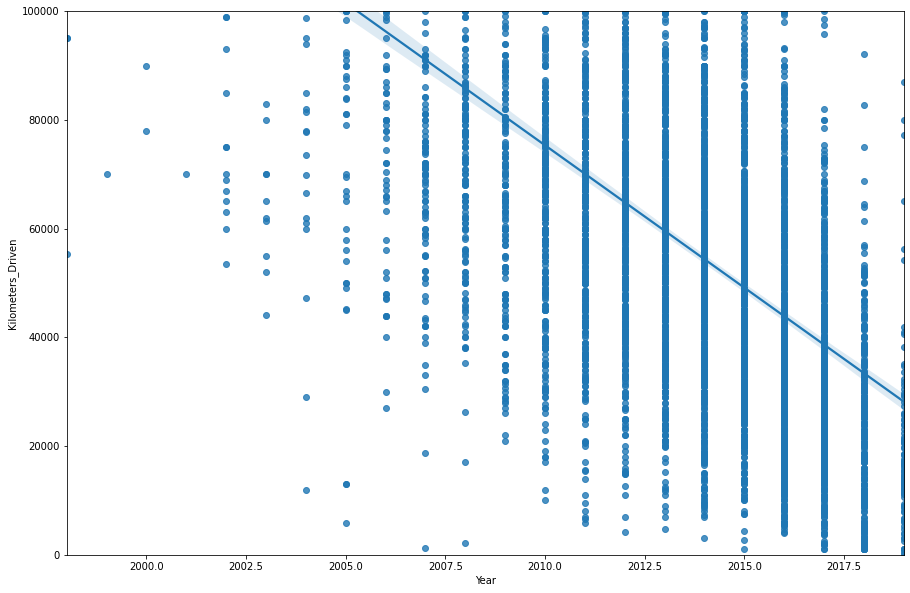

In [34]:
# Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan argumen yang mendukung jawaban.
plt.figure(figsize=(15,10))
plt.ylim([0, 100000])
sns.regplot(x='Year', y='Kilometers_Driven', data=df)

In [35]:
df[['Year','Kilometers_Driven']].corr()

,Year,Kilometers_Driven
Year,1.000000,-0.448798
Kilometers_Driven,-0.448798,1.000000


In [36]:
df.corr()

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.448798,0.012404,0.305537
Kilometers_Driven,-0.448798,1.000000,0.210550,-0.168469
Seats,0.012404,0.210550,1.000000,0.052657
Price,0.305537,-0.168469,0.052657,1.000000


In [37]:
# Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?
df['Owner_Type'].describe()

count      5974
unique        4
top       First
freq       4902
Name: Owner_Type, dtype: object

In [38]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [39]:
kepemilikan = df[(df['Owner_Type'] != 'First') & (df['Owner_Type'] != 'Second')]

In [40]:
kepemilikan['Owner_Type'].value_counts()

Third             111
Fourth & Above      8
Name: Owner_Type, dtype: int64

In [41]:
# Feature Engineering
# Splitting String from Column Mileage (kmpl), Engine (CC), Power (bhp) 
df['Mileage (kmpl)'] = df['Mileage'].apply(lambda x: str(x).split(" ")[0])
df['Engine (CC)'] = df['Engine'].apply(lambda x: str(x).split(" ")[0])
df['Power (bhp)'] = df['Power'].apply(lambda x: str(x).split(" ")[0])

In [42]:
# Converting data type
df['Mileage (kmpl)'] = df['Mileage (kmpl)'].astype('float')
df['Engine (CC)'] = df['Engine (CC)'].astype('float')

In [43]:
# Power (bph) gabisa langsung di convert karena ternyata dia punya value "null" which is string
df = df[df['Power (bhp)'] != "null"]

In [44]:
df['Power (bhp)'] = df['Power (bhp)'].astype('float')

In [45]:
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand_name,Kilometers_binned,Mileage (kmpl),Engine (CC),Power (bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,rendah,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,rendah,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,rendah,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,rendah,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,rendah,15.20,1968.0,140.80
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35,Hyundai,rendah,21.10,814.0,55.20
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,Nissan,rendah,23.08,1461.0,63.10
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50,Toyota,rendah,11.36,2755.0,171.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20,Volkswagen,rendah,20.54,1598.0,103.60
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95,Tata,rendah,22.30,1248.0,74.00


In [46]:
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand_name,Kilometers_binned,Mileage (kmpl),Engine (CC),Power (bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,rendah,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,rendah,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,rendah,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,rendah,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,rendah,15.20,1968.0,140.80
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35,Hyundai,rendah,21.10,814.0,55.20
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,Nissan,rendah,23.08,1461.0,63.10
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50,Toyota,rendah,11.36,2755.0,171.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20,Volkswagen,rendah,20.54,1598.0,103.60
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95,Tata,rendah,22.30,1248.0,74.00


In [47]:
# Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?
df['Mileage (kmpl)'].describe()

count    5871.000000
mean       18.278232
std         4.365925
min         0.000000
25%        15.260000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage (kmpl), dtype: float64

In [48]:
hemat = df[df['Mileage (kmpl)'] == max(df['Mileage (kmpl)'])]

In [49]:
hemat

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand_name,Kilometers_binned,Mileage (kmpl),Engine (CC),Power (bhp)
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,2.96,Maruti,rendah,33.54,998.0,67.04
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,3.05,Maruti,rendah,33.54,998.0,67.04
2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,3.90,Maruti,rendah,33.54,998.0,67.04
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,3.25,Maruti,rendah,33.54,998.0,67.04
4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,2.85,Maruti,rendah,33.54,998.0,67.04


In [50]:
# Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban.
# Pearson Correlation
corr = df.corr()
corr

,Year,Kilometers_Driven,Seats,Price,Mileage (kmpl),Engine (CC),Power (bhp)
Year,1.000000,-0.445758,0.007901,0.299192,0.285760,-0.068513,0.014032
Kilometers_Driven,-0.445758,1.000000,0.212992,-0.163565,-0.132564,0.161086,0.003689
Seats,0.007901,0.212992,1.000000,0.055959,-0.331619,0.401433,0.101684
Price,0.299192,-0.163565,0.055959,1.000000,-0.341924,0.657790,0.772661
Mileage (kmpl),0.285760,-0.132564,-0.331619,-0.341924,1.000000,-0.637349,-0.538946
Engine (CC),-0.068513,0.161086,0.401433,0.657790,-0.637349,1.000000,0.866174
Power (bhp),0.014032,0.003689,0.101684,0.772661,-0.538946,0.866174,1.000000


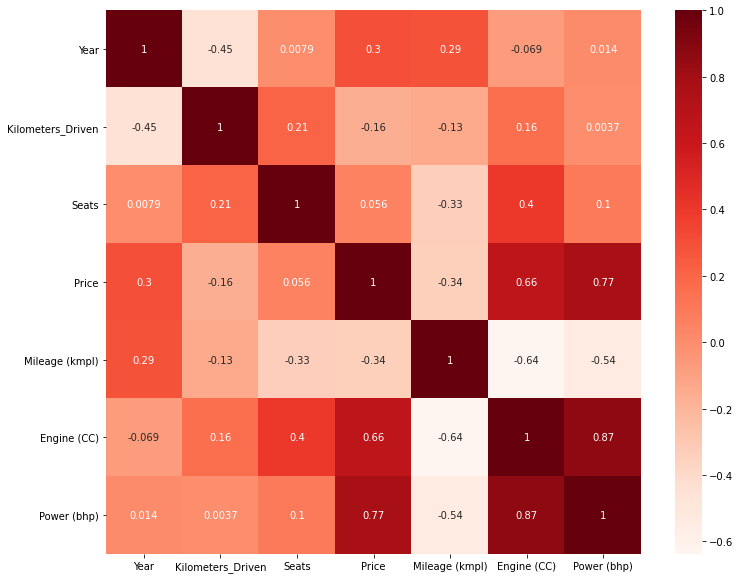

In [51]:
# Plotting heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [52]:
# Correlation with output variable
corr_target = abs(corr["Price"])

# Selecting highly correlated features
relevant_features = corr_target[corr_target>0.5]
relevant_features

Price          1.000000
Engine (CC)    0.657790
Power (bhp)    0.772661
Name: Price, dtype: float64

In [53]:
df[["Engine (CC)","Power (bhp)"]].corr()

,Engine (CC),Power (bhp)
Engine (CC),1.000000,0.866174
Power (bhp),0.866174,1.000000


In [54]:
from scipy import stats

In [55]:
pearson_coef, p_value = stats.pearsonr(df['Engine (CC)'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6577897004420817  with a P-value of P = 0.0


In [56]:
pearson_coef, p_value = stats.pearsonr(df['Power (bhp)'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7726612287020695  with a P-value of P = 0.0


(0.0, 168.16492792894286)

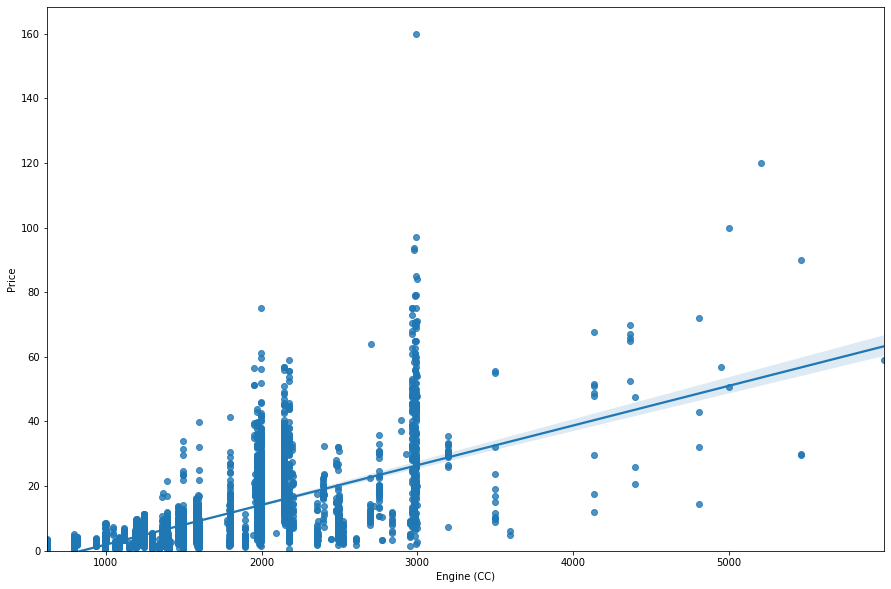

In [57]:
# Engine (CC) as potential predictor variable of Price
plt.figure(figsize=(15,10))
sns.regplot(x="Engine (CC)", y="Price", data=df)
plt.ylim(0,)

(0.0, 168.1850191430393)

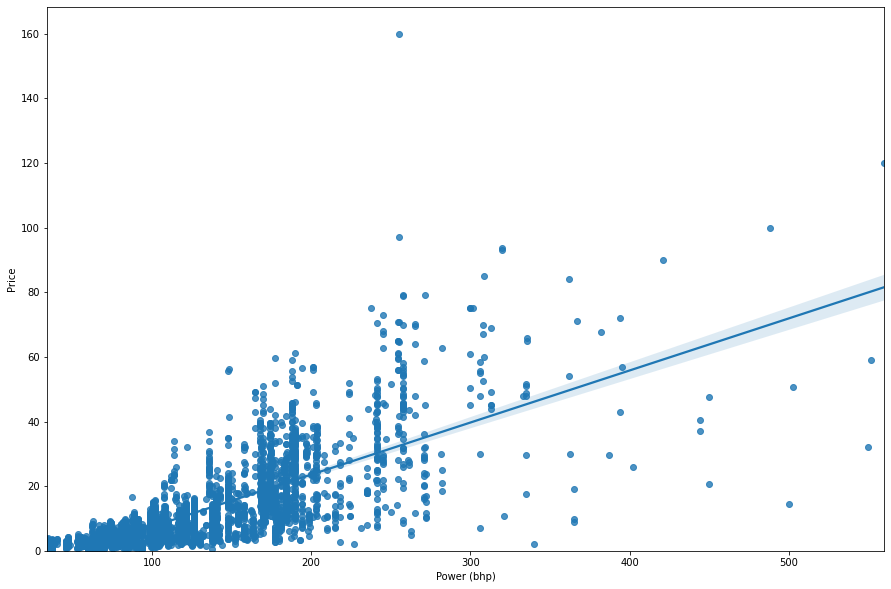

In [58]:
# Power (bhp) as potential predictor variable of Price
plt.figure(figsize=(15,10))
sns.regplot(x="Power (bhp)", y="Price", data=df)
plt.ylim(0,)

In [59]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand_name,Kilometers_binned,Mileage (kmpl),Engine (CC),Power (bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,rendah,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,rendah,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,rendah,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,rendah,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,rendah,15.20,1968.0,140.80


In [60]:
# ANOVA
df_gp = df[['Location', 'brand_name', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Price']]
grouped = df_gp[['Location', 'Price']].groupby(['Location'])
grouped.head()

,Location,Price
0,Mumbai,1.75
1,Pune,12.50
2,Chennai,4.50
3,Chennai,6.00
4,Coimbatore,17.74
5,Hyderabad,2.35
6,Jaipur,3.50
7,Mumbai,17.50
8,Pune,5.20
9,Chennai,1.95


In [61]:
grouped1 = df_gp[['Fuel_Type', 'Price']].groupby(['Fuel_Type'])
grouped1.head()

,Fuel_Type,Price
0,CNG,1.75
1,Diesel,12.50
2,Petrol,4.50
3,Diesel,6.00
4,Diesel,17.74
5,LPG,2.35
6,Diesel,3.50
7,Diesel,17.50
10,Petrol,9.95
11,Petrol,4.49


In [62]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped1.get_group('CNG')['Price'], grouped1.get_group('Diesel')['Price'], grouped1.get_group('LPG')['Price'], grouped1.get_group('Petrol')['Price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 225.78656131838767 , P = 1.2491039392433449e-138


In [63]:
grouped2 = df_gp[['Transmission', 'Price']].groupby(['Transmission'])

# ANOVA
f_val, p_val = stats.f_oneway(grouped2.get_group('Manual')['Price'], grouped2.get_group('Automatic')['Price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 3063.7228562465693 , P = 0.0


In [64]:
grouped3 = df_gp[['Owner_Type', 'Price']].groupby(['Owner_Type'])

# ANOVA
f_val, p_val = stats.f_oneway(grouped3.get_group('First')['Price'], grouped3.get_group('Second')['Price'], grouped3.get_group('Third')['Price'], grouped3.get_group('Fourth & Above')['Price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 16.313374885344526 , P = 1.480826406264121e-10


In [65]:
grouped4 = df_gp[['brand_name', 'Price']].groupby(['brand_name'])
# ANOVA
f_val, p_val = stats.f_oneway(grouped4.get_group('Maruti')['Price'], grouped4.get_group('Hyundai')['Price'], 
                              grouped4.get_group('Honda')['Price'], grouped4.get_group('Audi')['Price'], 
                              grouped4.get_group('Nissan')['Price'], grouped4.get_group('Toyota')['Price'],
       grouped4.get_group('Volkswagen')['Price'], grouped4.get_group('Tata')['Price'], grouped4.get_group('Land')['Price'], 
       grouped4.get_group('Mitsubishi')['Price'], grouped4.get_group('Renault')['Price'], grouped4.get_group('Mercedes-Benz')['Price'], 
       grouped4.get_group('BMW')['Price'], grouped4.get_group('Mahindra')['Price'], grouped4.get_group('Ford')['Price'], grouped4.get_group('Porsche')['Price'], 
       grouped4.get_group('Datsun')['Price'], grouped4.get_group('Jaguar')['Price'], grouped4.get_group('Volvo')['Price'], grouped4.get_group('Chevrolet')['Price'], 
       grouped4.get_group('Skoda')['Price'], grouped4.get_group('Mini')['Price'], grouped4.get_group('Fiat')['Price'], grouped4.get_group('Jeep')['Price'], 
       grouped4.get_group('Ambassador')['Price'], grouped4.get_group('Isuzu')['Price'], grouped4.get_group('ISUZU')['Price'], 
       grouped4.get_group('Force')['Price'], grouped4.get_group('Bentley')['Price'], grouped4.get_group('Lamborghini')['Price'])
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 295.3624273342199 , P = 0.0


In [66]:
df[df['brand_name'] == 'Isuzu']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand_name,Kilometers_binned,Mileage (kmpl),Engine (CC),Power (bhp)
2900,Isuzu MUX 4WD,Jaipur,2017,34429,Diesel,Automatic,First,13.8 kmpl,2999 CC,174.57 bhp,7.0,20.0,Isuzu,rendah,13.8,2999.0,174.57


In [67]:
grouped4.head()

,brand_name,Price
0,Maruti,1.75
1,Hyundai,12.50
2,Honda,4.50
3,Maruti,6.00
4,Audi,17.74
5,Hyundai,2.35
6,Nissan,3.50
7,Toyota,17.50
8,Volkswagen,5.20
9,Tata,1.95


In [68]:
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand_name,Kilometers_binned,Mileage (kmpl),Engine (CC),Power (bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,rendah,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,rendah,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,rendah,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,rendah,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,rendah,15.20,1968.0,140.80
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35,Hyundai,rendah,21.10,814.0,55.20
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,Nissan,rendah,23.08,1461.0,63.10
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50,Toyota,rendah,11.36,2755.0,171.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20,Volkswagen,rendah,20.54,1598.0,103.60
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95,Tata,rendah,22.30,1248.0,74.00


# **ANALISIS TAMBAHAN**


In [69]:
# Distribusi Price used car
df['Price'].describe()

count    5871.000000
mean        9.594483
std        11.227150
min         0.440000
25%         3.515000
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

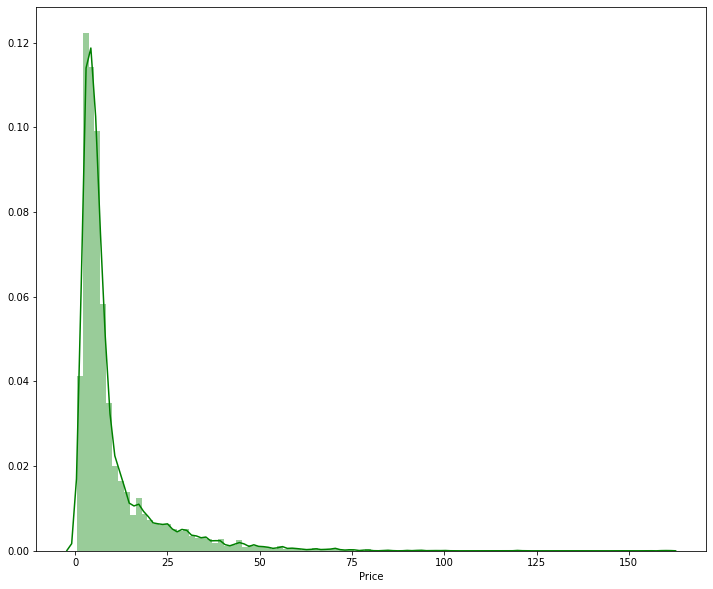

In [70]:
plt.figure(figsize=(12, 10))
sns.distplot(df['Price'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [71]:
print("Skew ", df['Price'].skew())

Skew  3.3255538014881774


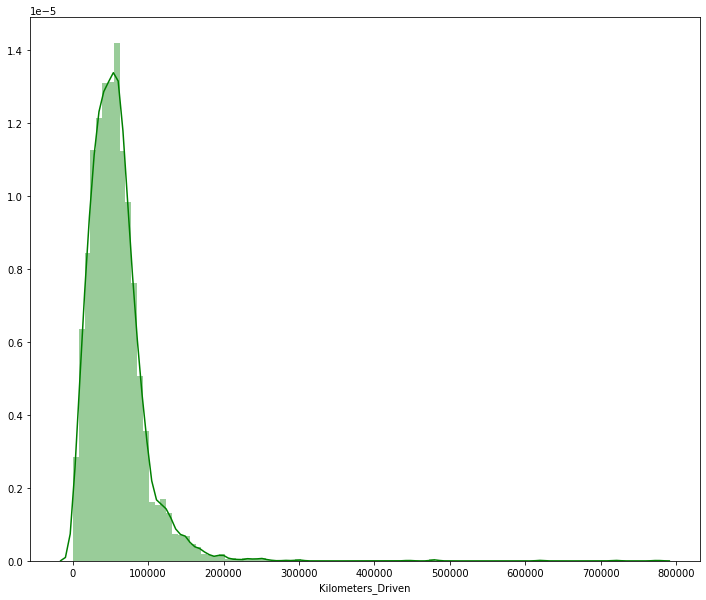

In [72]:
plt.figure(figsize=(12, 10))
sns.distplot(df['Kilometers_Driven'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [73]:
print("Skew ", df['Kilometers_Driven'].skew())

Skew  4.301804454383961


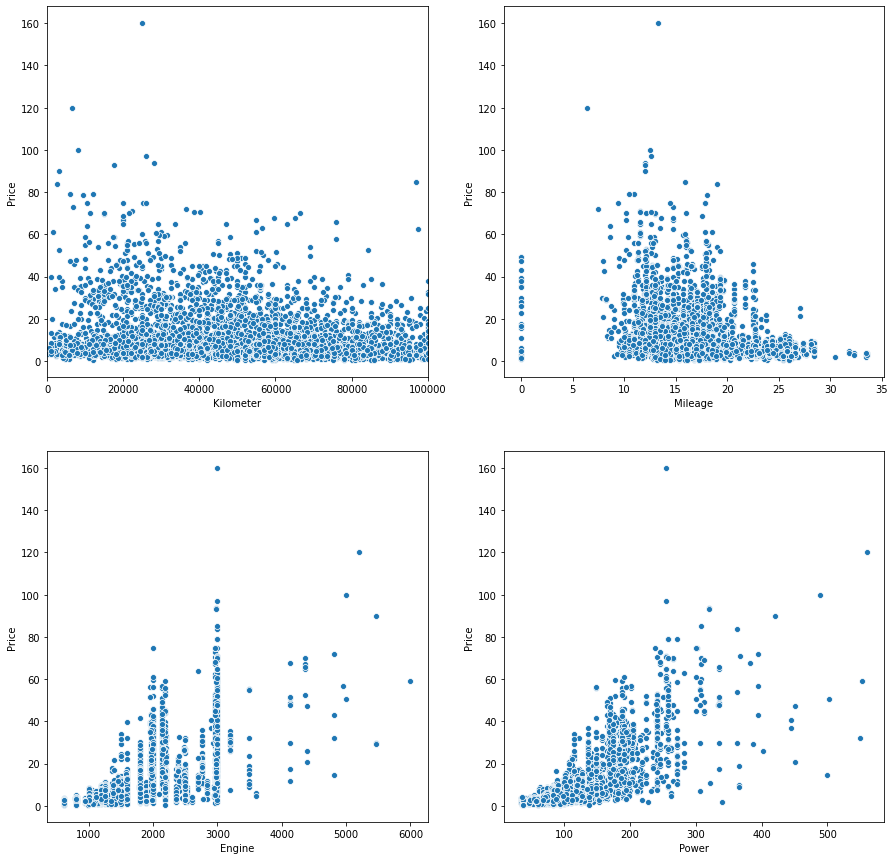

In [74]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(2,2,1)
plt.xlim([0, 100000])
p1 = sns.scatterplot(x="Kilometers_Driven", y="Price", data=df)
loc, labels = plt.xticks()
ax1.set_xlabel('Kilometer')

ax2 = fig.add_subplot(2,2,2)
#plt.xlim([0, 100000])
p2 = sns.scatterplot(x="Mileage (kmpl)", y="Price", data=df)
loc, labels = plt.xticks()
ax2.set_xlabel('Mileage')

ax3 = fig.add_subplot(2,2,3)
#plt.xlim([0, 100000])
p3 = sns.scatterplot(x="Engine (CC)", y="Price", data=df)
loc, labels = plt.xticks()
ax3.set_xlabel('Engine')

ax4 = fig.add_subplot(2,2,4)
#plt.xlim([0, 100000])
p4 = sns.scatterplot(x="Power (bhp)", y="Price", data=df)
loc, labels = plt.xticks()
ax4.set_xlabel('Power')

plt.show()

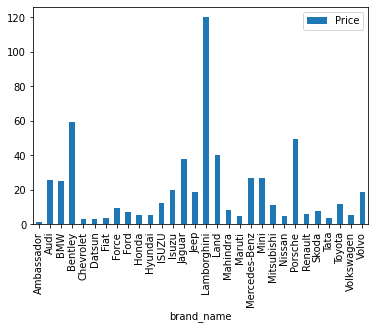

In [75]:
df_vis_1 = pd.DataFrame(df.groupby('brand_name')['Price'].mean())
df_vis_1.plot.bar()
plt.show()

In [76]:
df1 = pd.read_csv('used_car_data.csv')

In [77]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [78]:
df1.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

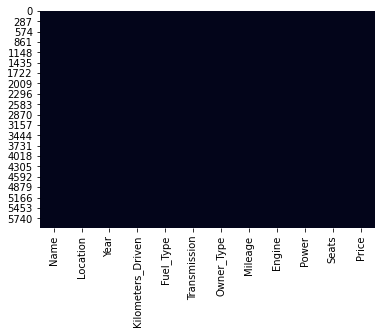

In [79]:
sns.heatmap(df1.isna(), cbar=False)

In [80]:
import missingno as msno

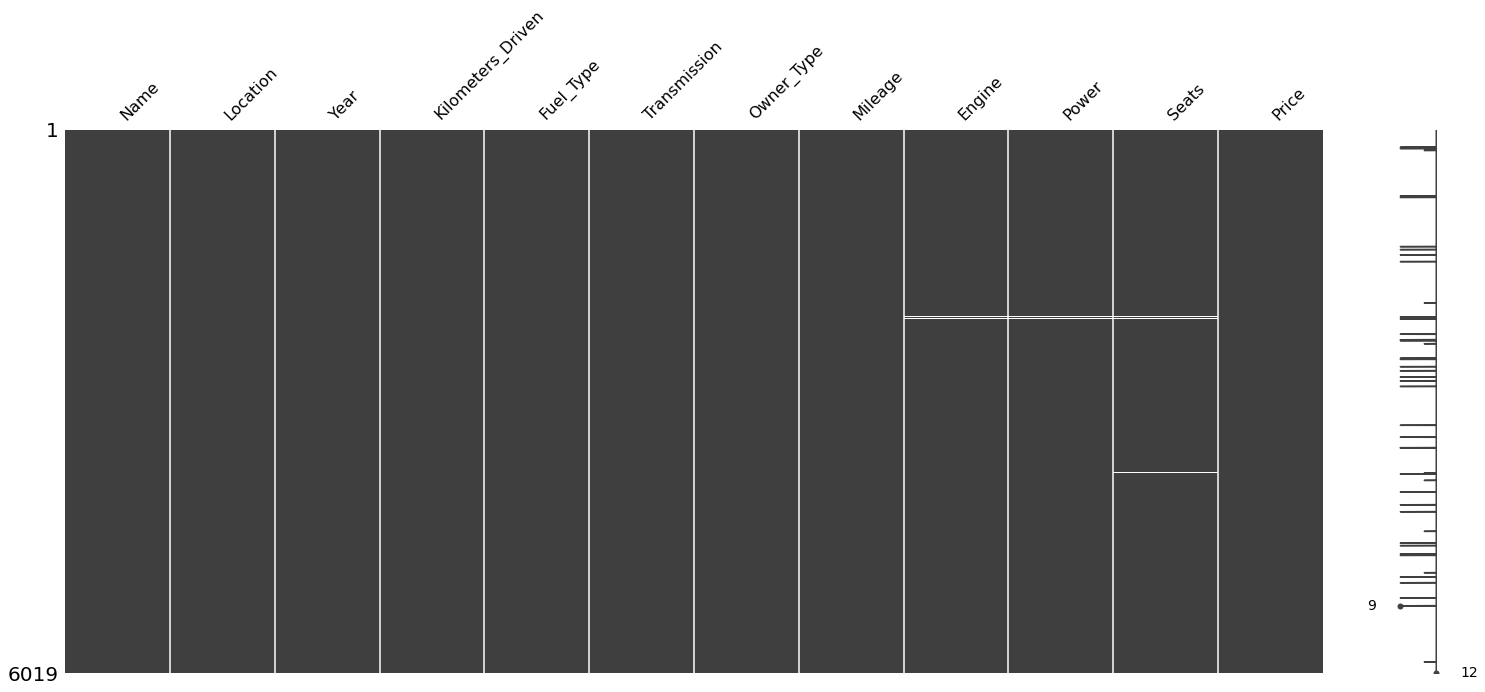

In [81]:
msno.matrix(df1)

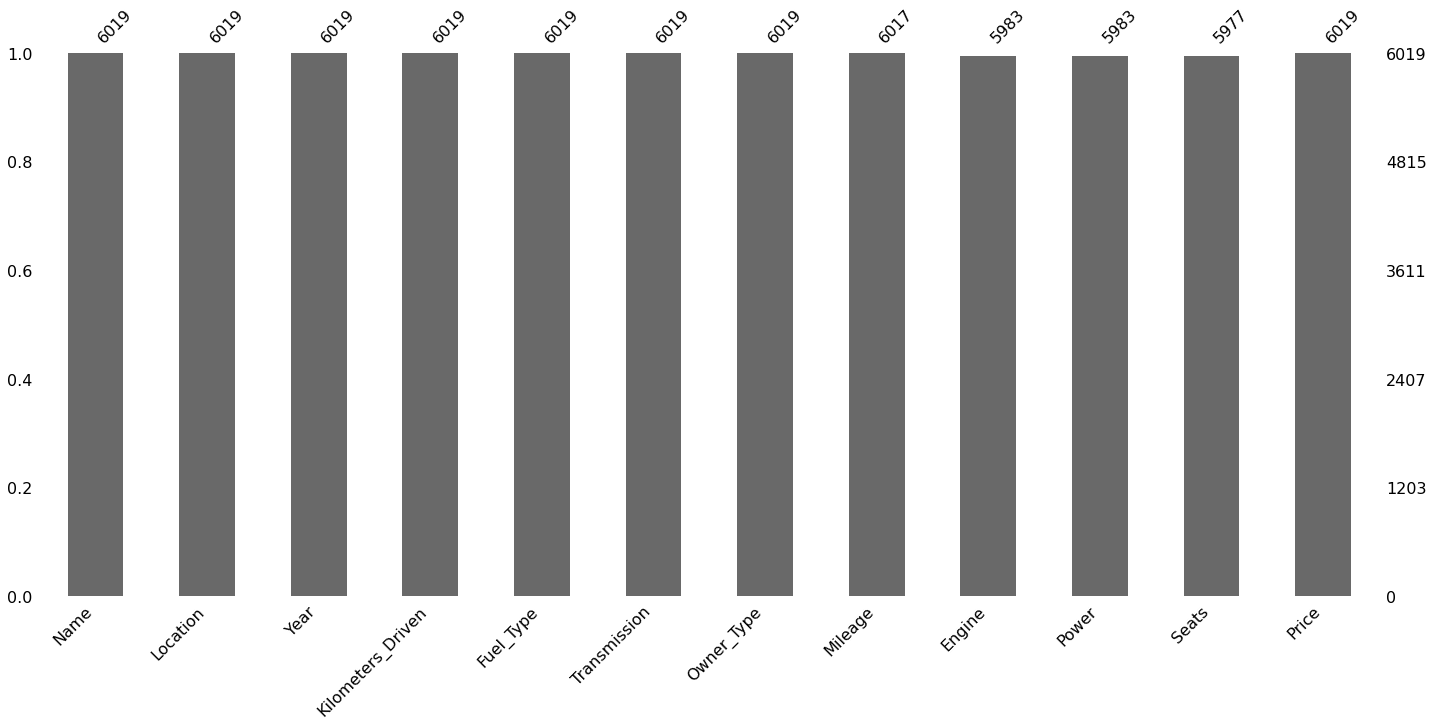

In [82]:
msno.bar(df1)

In [84]:
df2 = pd.read_csv('used_car_data.csv')

In [85]:
null_data = df2[df2.isnull().any(axis=1)]

In [86]:
null_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,1.70


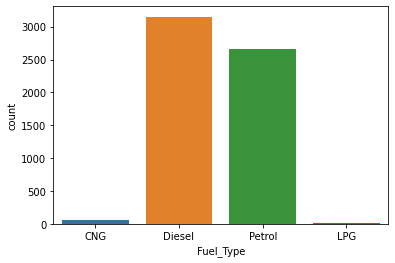

In [87]:
# Visualisasi distribusi
sns.countplot(x='Fuel_Type', data=df)

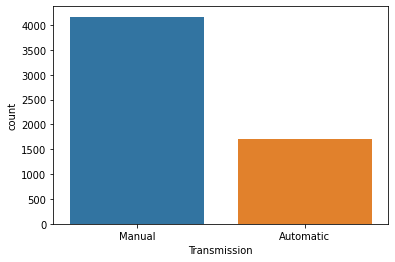

In [88]:
sns.countplot(x='Transmission', data=df)

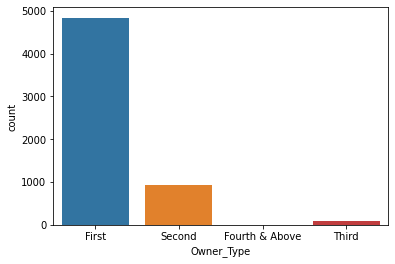

In [89]:
sns.countplot(x='Owner_Type', data=df)

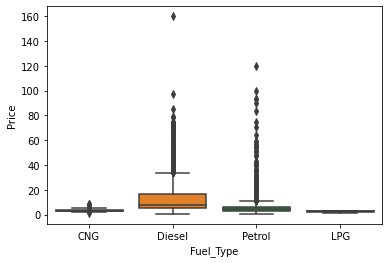

In [90]:
# Distribusi harga mobil bekas di India terhadap beberapa variabel kategorik
sns.boxplot(x='Fuel_Type', y='Price', data=df)

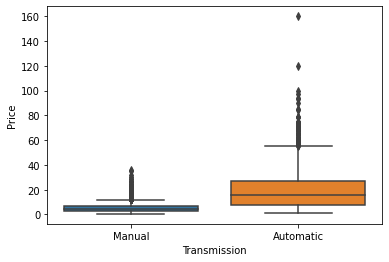

In [91]:
sns.boxplot(x='Transmission', y='Price', data=df)

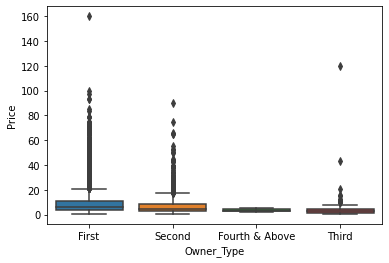

In [92]:
sns.boxplot(x='Owner_Type', y='Price', data=df)

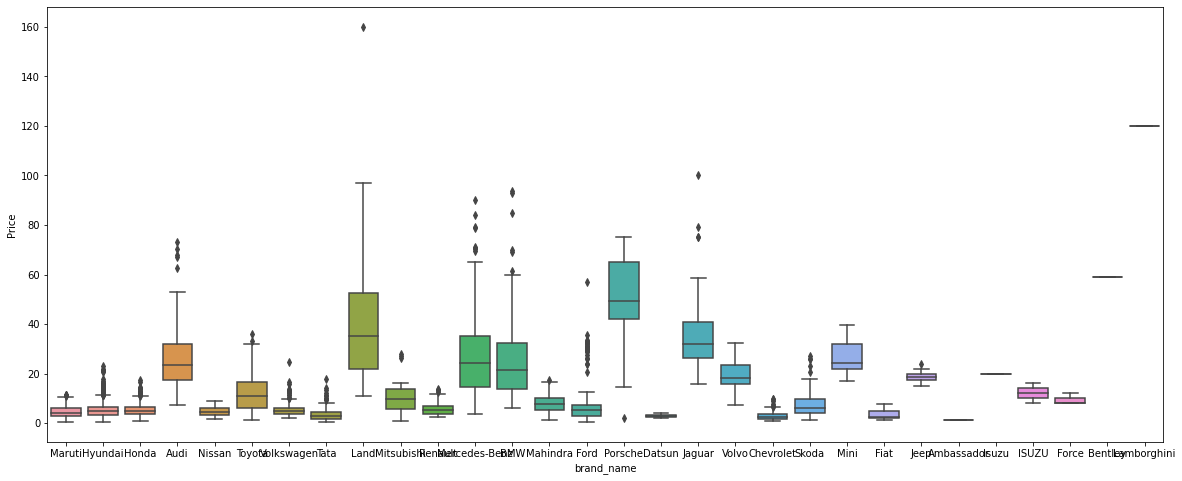

In [96]:
plt.figure(figsize=(20,8))
sns.boxplot(x='brand_name', y='Price', data=df)
plt.show()

In [93]:
import scipy

In [97]:
# Logtransform target variable
df['Price'] = np.log1p(df['Price'])

In [ ]:
df.head()

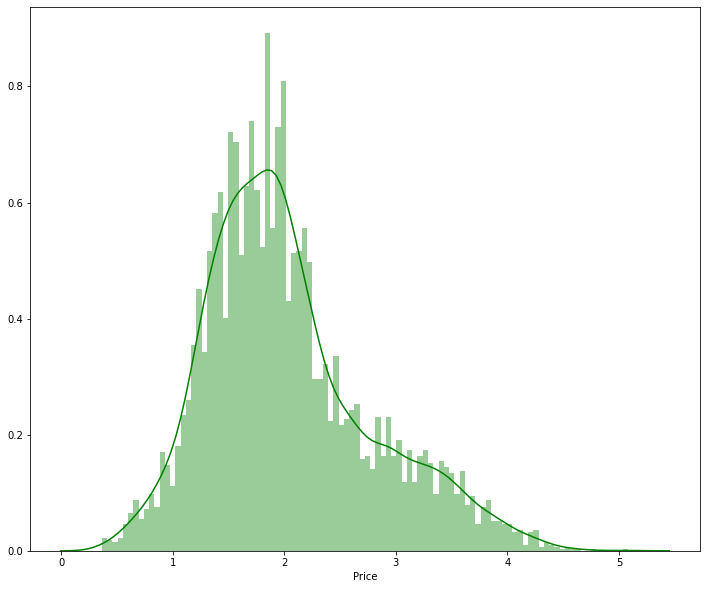

In [98]:
plt.figure(figsize=(12, 10))
sns.distplot(df['Price'], color='g', bins=100, hist_kws={'alpha': 0.4})

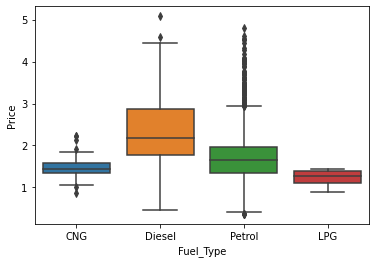

In [99]:
# Distribusi harga mobil bekas di India terhadap beberapa variabel kategorik (setelah normalisasi)
sns.boxplot(x='Fuel_Type', y='Price', data=df)

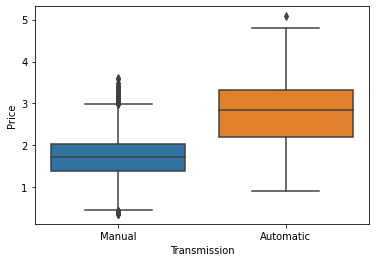

In [100]:
sns.boxplot(x='Transmission', y='Price', data=df)

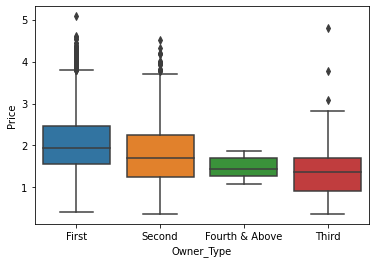

In [101]:
sns.boxplot(x='Owner_Type', y='Price', data=df)

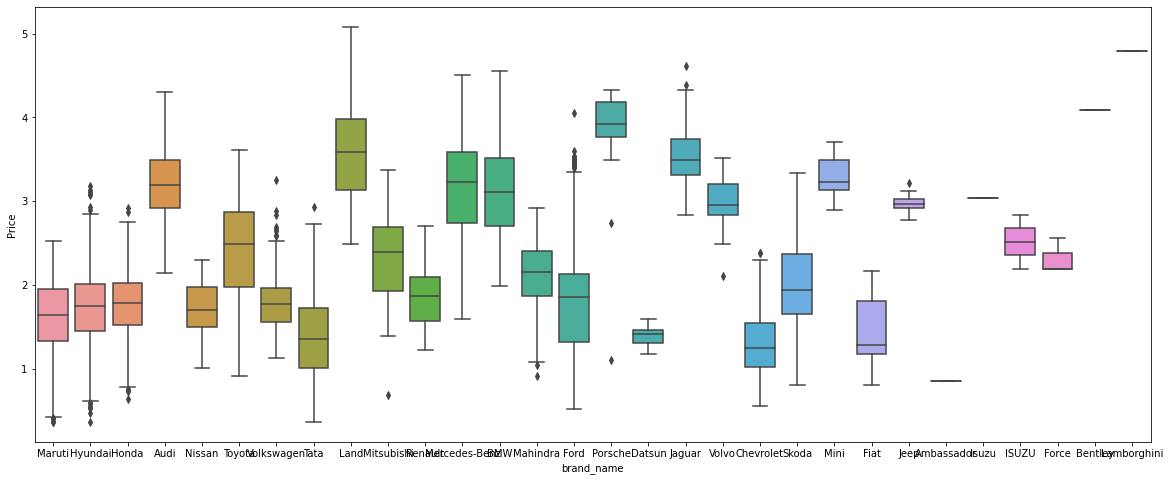

In [103]:
plt.figure(figsize=(20,8))
sns.boxplot(x='brand_name', y='Price', data=df)
plt.show()